# MSIN0097: Predictive Analytics 23/24

## Individual Coursework 

### Table of Contents 
* [Introduction](#introduction)
* [Exploratory Data Analysis](#eda) 
    * [Quick Look at the Data Structure](#data-structure)
    * [Data Visualisation](#data-visualisation)
* [Data Wrangling](#data-wrangling)
    * [Dropping Columns](#columns-drop)
    * [Fixing Data Types](#data-types)
    * [Handling Missing Values](#missing-values)
    * [Feature Engineering](#feature-eng)
    * [Encoding Categorical Variables](#data-encode)
    * [Final check of the Clean Dataset](#final-check)
* [Building the Model](#model-building)
    * [Training the Models](#model-training)
* [FineTuning the Models](#model-fine-tuning) 
    * [Neural Network](#neural-network)
        * [Error Analysis](#nn-ea)
    * [Random Forest](#random-forest)
        * [Feature Importance](#rf-features)
        * [Error Analysis](#rf-ea)
    * [XGBoost](#XG-Boost)
        * [Feature Importance](#xgb-features)
        * [Error Analysis](#xgb-ea)
* [Comparison](#comparison)
* [Conclusion](#conclusion)

# Introduction <a class="anchor" id="introduction"></a>

The FIFA 22 dataset encapsulates a comprehensive array of data points representing player attributes in the popular video game FIFA 22, developed by EA Sports.

The objective with the FIFA 22 dataset is to predict a player’s overall rating, a key metric that offers a quick, comprehensive assessment crucial for comparing and valuing players across teams and leagues.

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# importing sklearn utilities for data preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, Normalizer
from sklearn.impute import SimpleImputer

# importing models from sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline

# importing various machine learning models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
import xgboost as xgb
from xgboost import XGBRegressor

# importing TensorFlow and Keras for deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping
import random as python_random
from kerastuner.tuners import RandomSearch

/var/folders/nf/v5yf655d1yb5tq84_cx72jxr0000gn/T/ipykernel_20069/3041639666.py:37: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [2]:
# loading the dataset
fifa_22 = pd.read_csv('/FIFA22_official_data.csv')

# Exploratory Data Analysis <a class="anchor" id="eda"></a>

In [3]:
fifa_22.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0


In [4]:
fifa_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16710 non-null  int64  
 1   Name                      16710 non-null  object 
 2   Age                       16710 non-null  int64  
 3   Photo                     16710 non-null  object 
 4   Nationality               16710 non-null  object 
 5   Flag                      16710 non-null  object 
 6   Overall                   16710 non-null  int64  
 7   Potential                 16710 non-null  int64  
 8   Club                      16446 non-null  object 
 9   Club Logo                 16710 non-null  object 
 10  Value                     16710 non-null  object 
 11  Wage                      16710 non-null  object 
 12  Special                   16710 non-null  int64  
 13  Preferred Foot            16710 non-null  object 
 14  Intern

The dataset has columns for player ID, name, age, nationality, club, and various playing statistics.

Player images, national flags, and club logos are represented by URLs. These will be dropped later for modelling. 

'Overall', which is our target variable for prediction, is the current overall rating of the player, summarizing their skill level and general quality as a player. Potential is the future rating a player could reach whereas The Best Overall rating is the highest overall rating the player can achieve in their best position.

There are detailed attributes for player skills, such as Dribbling, Shooting, and DefensiveAwareness, among others.

In [5]:
# summarising the statistics 
fifa_22.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Overall Rating,DefensiveAwareness
count,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16684.000000,16710.000000,...,892.000000,16710.000000,16673.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,15818.000000
mean,220560.467923,25.727409,67.646320,72.572292,1652.497307,1.169958,3.008199,2.475464,20.458643,52.212448,...,48.021300,49.155536,46.830564,15.683662,15.521364,15.457989,15.581927,15.789228,68.565410,48.019408
std,38496.607959,5.048910,6.457695,5.688085,257.271696,0.485305,0.681742,0.791414,17.699813,17.772348,...,21.904204,21.454857,21.175431,17.009757,16.302298,16.099993,16.584045,17.318251,6.256253,20.181354
min,27.000000,16.000000,28.000000,38.000000,571.000000,1.000000,1.000000,1.000000,1.000000,7.000000,...,4.000000,3.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,3.000000
25%,203891.250000,22.000000,63.000000,69.000000,1525.000000,1.000000,3.000000,2.000000,8.000000,42.000000,...,27.000000,29.000000,26.000000,8.000000,8.000000,8.000000,8.000000,8.000000,65.000000,30.000000
50%,229253.000000,25.000000,68.000000,72.000000,1687.000000,1.000000,3.000000,2.000000,17.000000,57.000000,...,53.000000,57.000000,54.000000,11.000000,11.000000,11.000000,11.000000,11.000000,68.000000,54.000000
75%,245368.750000,29.000000,72.000000,76.000000,1826.000000,1.000000,3.000000,3.000000,27.000000,65.000000,...,67.000000,67.000000,65.000000,14.000000,14.000000,14.000000,14.000000,14.000000,73.000000,65.000000
max,264704.000000,54.000000,93.000000,95.000000,2341.000000,5.000000,5.000000,5.000000,99.000000,94.000000,...,94.000000,93.000000,95.000000,91.000000,92.000000,93.000000,93.000000,90.000000,93.000000,93.000000


The Overall rating averages around 67.6, with a potential average of 72.6, indicating that players generally have room to improve.

### Data Visualisation <a class="anchor" id="data-visualisation"></a>

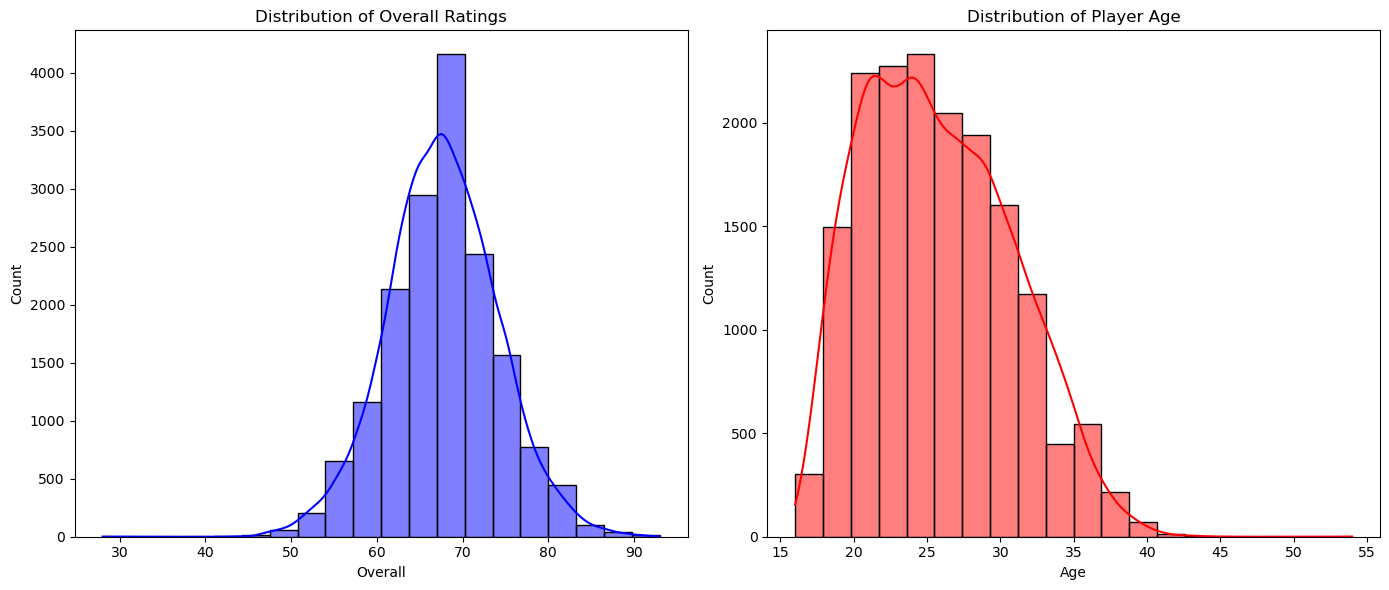

In [6]:
# distribution of 'Age' and 'Potential'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(fifa_22['Overall'], bins=20, kde=True, color = 'blue')
plt.title('Distribution of Overall Ratings')

plt.subplot(1, 2, 2)
sns.histplot(fifa_22['Age'], bins=20, kde=True, color='red')
plt.title('Distribution of Player Age')

plt.tight_layout()
plt.show()

Most players have ratings clustered around the mid-60s to mid-70s, with fewer players achieving ratings above 80, indicating these are likely the elite players.

The histogram for player ages indicates a typical right-skewed distribution, where most players are in their early to mid-20s, with fewer players as the age increases. This suggests that younger players dominate the dataset, which is common in sports where peak physical condition is crucial.

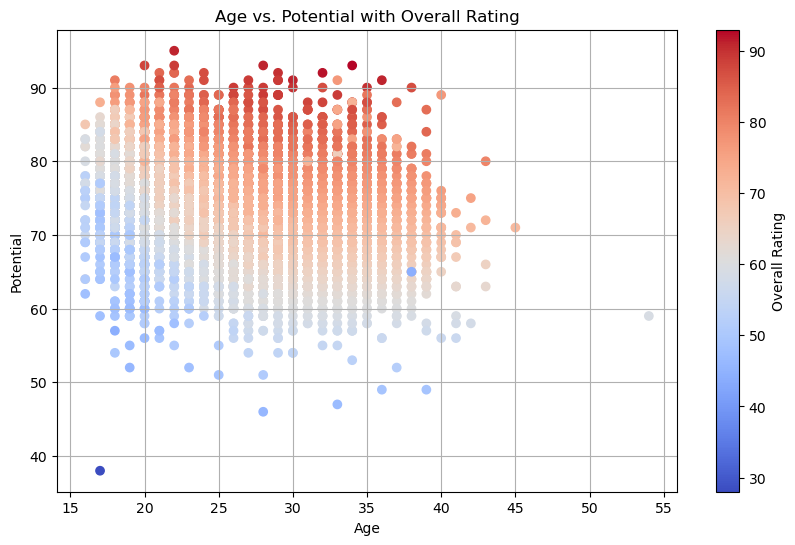

In [7]:
# 'age' vs. 'potential' with 'overall' rating as color gradient
plt.figure(figsize=(10, 6))
plt.scatter(fifa_22['Age'], fifa_22['Potential'], c=fifa_22['Overall'], cmap='coolwarm')
plt.colorbar(label='Overall Rating')
plt.xlabel('Age')
plt.ylabel('Potential')
plt.title('Age vs. Potential with Overall Rating')
plt.grid(True)
plt.show()

Young players exhibit higher potential, which aligns with developmental opportunities. As players age, potential plateaus, suggesting they've reached their skill cap. High potential often correlates with higher current ratings, and elite performance extends into the 30s. Mid-career players present a high variance in potential but generally peak in performance, while potential declines after the 30s, marking the typical career zenith.

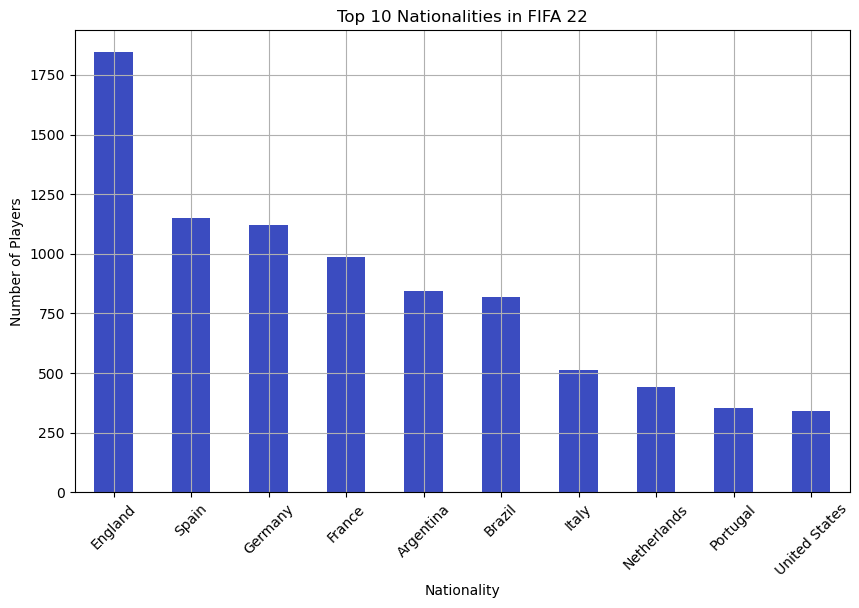

In [8]:
# Nationality Distribution
top_nationalities = fifa_22['Nationality'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_nationalities.plot(kind='bar', cmap='coolwarm')
plt.title('Top 10 Nationalities in FIFA 22')
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The bar chart shows the top 10 nationalities represented in FIFA 22, with England and Spain having the highest number of players in the game. There is a significant drop in player counts from these two countries to the others

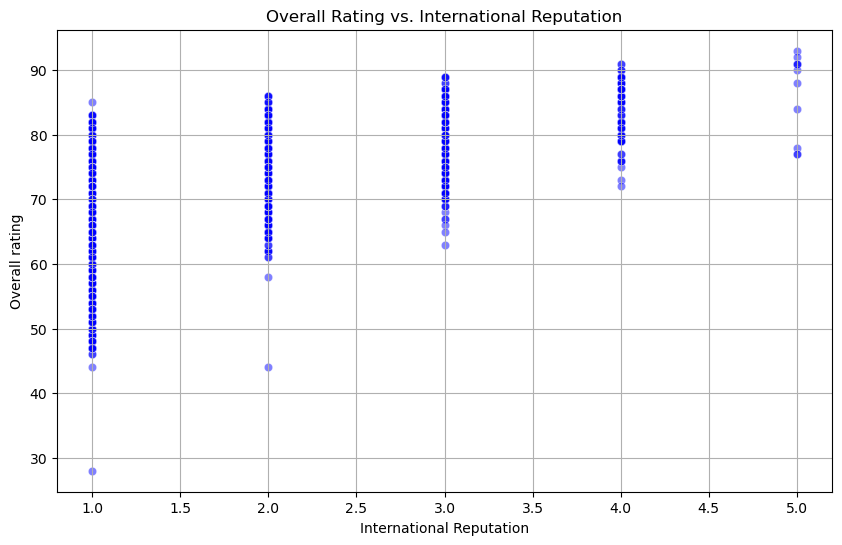

In [9]:
# Overall Rating vs. International Reputation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fifa_22['International Reputation'], y=fifa_22['Overall'], alpha=0.5, color = 'blue')
plt.title('Overall Rating vs. International Reputation')
plt.xlabel('International Reputation')
plt.ylabel('Overall rating')
plt.grid(True)
plt.show()

The scatter plot shows a positive correlation between 'Overall' rating and 'International Reputation'. Players with higher international reputations tend to have higher overall ratings, and as reputation increases, the range of overall ratings widens, especially for the highest reputations.

In [10]:
# creating a correlation matrix to see how 'Overall' correlates with other features

# selecting only numeric columns for correlation analysis
numeric_fifa_22 = fifa_22.select_dtypes(include=['int64', 'float64'])

# correlation matrix 
numeric_correlation_matrix = numeric_fifa_22.corr()
potential_numeric_correlations = numeric_correlation_matrix['Overall'].sort_values(ascending=False)
potential_numeric_correlations

Overall                     1.000000
Best Overall Rating         0.985377
Reactions                   0.869650
Composure                   0.683421
Potential                   0.586648
Special                     0.576851
ShotPower                   0.513840
International Reputation    0.511914
Vision                      0.495250
ShortPassing                0.483895
LongPassing                 0.474325
Age                         0.473963
BallControl                 0.413273
Curve                       0.369446
Aggression                  0.363796
LongShots                   0.361913
Crossing                    0.357150
Volleys                     0.338185
FKAccuracy                  0.338062
Dribbling                   0.328883
Strength                    0.321999
Skill Moves                 0.319352
Positioning                 0.317741
Stamina                     0.315613
HeadingAccuracy             0.301434
Penalties                   0.301394
Interceptions               0.292148
F

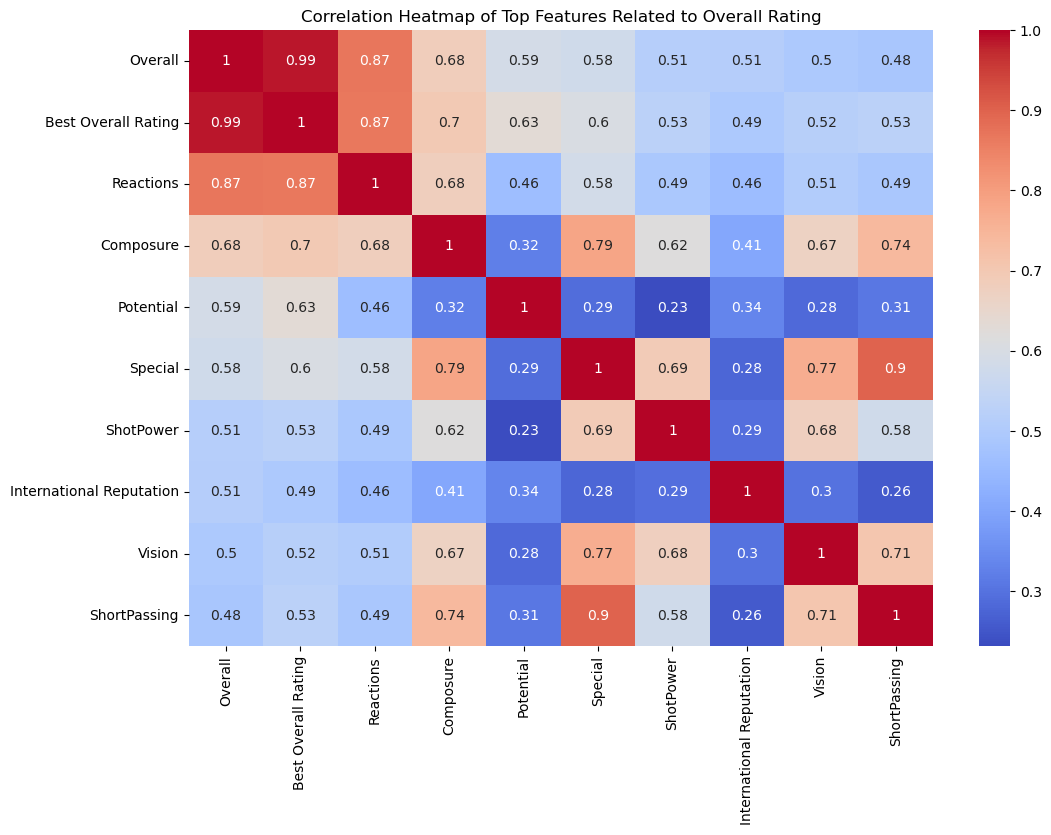

In [11]:
# correlation heatmap of top features

# selecting top 10 features correlated with potential for the heatmap
top_features = potential_numeric_correlations.head(10).index
top_correlation_matrix = numeric_fifa_22[top_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(top_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Top Features Related to Overall Rating')
plt.show()

Best Overall Rating (0.99 correlation) is the highest correlation, suggesting it's nearly identical.

Reactions (0.87 correlation)suggests that Faster reaction times are associated with higher overall rating.

Composure (0.68 correlation)implies that players with higher composure are typically rated higher overall.

Potential (0.59 correlation) has a strong positive correlation with Overall Rating, suggesting that players with higher potential often have higher current overall ratings.

Special (0.58 correlation) suggesting that a player's special traits may influence their overall rating to some extent.

International Reputation (0.51 correlation) shows that players with a higher international reputation tend to have higher potential.

Other characteristics like Vision, Short and Long Passing, Age, Ball Control etc also show a positive correlation with potential but not as strongly predictive of the 'Overall' rating as 'Reactions' or 'Composure'.

# Data Wrangling <a class="anchor" id="data-wrangling"></a>

#### Dropping Columns <a class="anchor" id="columns-drop"></a>

On first look, the following columns can be dropped.

1. ID: this is a unique identifier for each player. 
2. Name : this is the full name of the football player. 
3. Photo: this contains URLs to player photos.
4. Flag: this contains URLs to country flags.
5. Club Logo: this contains URLs to club logos.
6. Real Face : this indicates whether the player’s real face has been used in the game or not.
7. Jersey Number : this is the number on the player's jersey.

In [12]:
# dropping the specified columns
fifa_clean = fifa_22.drop(['ID', 'Name', 'Photo','Nationality', 'Flag', 'Club Logo', 'Real Face', 'Jersey Number'], axis=1)

# confirming the changes
fifa_clean.head()

,Age,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,26,88,89,Manchester United,€107.5M,€250K,2341,Right,3.0,3.0,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,26,87,88,FC Bayern München,€93M,€140K,2314,Right,4.0,4.0,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,34,88,88,Atlético de Madrid,€44.5M,€135K,2307,Right,5.0,4.0,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,30,91,91,Manchester City,€125.5M,€350K,2304,Right,4.0,5.0,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,29,84,84,Sevilla FC,€37M,€45K,2292,Left,2.0,3.0,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0


Given the objective of predicitng 'Overall' rating, I will drop columns that is closely related to the target variable. 

1. Best Overall Rating : The best rating achieved by the player in their best position. 

2. Potential : The predicted future overall rating of the player at peak development.

In [13]:
fifa_clean[['Best Overall Rating', 'Overall', 'Potential']].head(10)

,Best Overall Rating,Overall,Potential
0,88.0,88,89
1,87.0,87,88
2,88.0,88,88
3,91.0,91,91
4,84.0,84,84
5,89.0,89,90
6,83.0,83,83
7,84.0,84,84
8,85.0,82,83
9,86.0,85,85


In [14]:
# dropping 'Best Overall Rating' and 'Potential' to avoid data leakage. 
fifa_clean = fifa_clean.drop(['Best Overall Rating', 'Potential'], axis=1)

In [15]:
fifa_clean[['Position', 'Best Position']].head()

,Position,Best Position
0,"<span class=""pos pos18"">CAM",CAM
1,"<span class=""pos pos11"">LDM",CM
2,"<span class=""pos pos24"">RS",ST
3,"<span class=""pos pos13"">RCM",CM
4,"<span class=""pos pos7"">LB",LB


The columns 'Position' and 'Best Position' are closely related. The Positions column is unclean as it has html tags included. I will just drop it. 

In [16]:
fifa_clean = fifa_clean.drop(['Position'], axis=1)

#### Fixing Data Types <a class="anchor" id="data-types"></a>

I will now fix data types i.e change non-numeric values to numeric values to prepare the data for predictive modelling.

In [17]:
fifa_clean.dtypes

Age                           int64
Overall                       int64
Club                         object
Value                        object
Wage                         object
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                       object
Crossing                    float64
Finishing                   float64
HeadingAccuracy             float64
ShortPassing                float64
Volleys                     float64
Dribbling                   float64
Curve                       float64
FKAccuracy                  float64
LongPassing                 float64
BallControl                 float64
Acceleration                

In [18]:
# checking the currency based columns 'Value' and 'Wage' along with hysical attributes 'Height' and 'Weight'
fifa_clean[['Value', 'Wage', 'Height', 'Weight']].head()

,Value,Wage,Height,Weight
0,€107.5M,€250K,179cm,69kg
1,€93M,€140K,189cm,82kg
2,€44.5M,€135K,182cm,83kg
3,€125.5M,€350K,181cm,70kg
4,€37M,€45K,172cm,69kg


In [19]:
# converting 'Height' and 'Weight' to numeric by removing 'cm' and 'kg'
fifa_clean['Height'] = fifa_clean['Height'].str.replace('cm', '').astype(float)
fifa_clean['Weight'] = fifa_clean['Weight'].str.replace('kg', '').astype(float)

In [20]:
# converting 'Value','Wage' to numeric values. Replacing 'M' and 'K' with their numeric equivalents
fifa_clean['Value'] = fifa_clean['Value'].str.extract(r'(\d+\.?\d*)')[0].astype(float) * 1e6
fifa_clean['Wage'] = fifa_clean['Wage'].str.extract(r'(\d+\.?\d*)')[0].astype(float) * 1e3

In [21]:
# confirming the changes
fifa_clean[['Value', 'Wage', 'Height', 'Weight']].head()

,Value,Wage,Height,Weight
0,107500000.0,250000.0,179.0,69.0
1,93000000.0,140000.0,189.0,82.0
2,44500000.0,135000.0,182.0,83.0
3,125500000.0,350000.0,181.0,70.0
4,37000000.0,45000.0,172.0,69.0


#### Handling Missing Values <a class="anchor" id="missing-values"></a>


In [22]:
# checking for missing values in each column
missing_values = fifa_clean.isnull().sum()
missing_values = missing_values[missing_values > 0]  # filter columns with missing values
missing_values_percentage = (missing_values / len(fifa_clean)) * 100  # calculate percentage of missing values

missing_values_df = pd.DataFrame({
    'missing_count': missing_values,
    'percentage': missing_values_percentage
}).sort_values(by='percentage', ascending=False)

missing_values_df

,missing_count,percentage
Marking,15818,94.661879
Loaned From,15578,93.225613
Release Clause,1749,10.466786
Joined,1512,9.048474
DefensiveAwareness,892,5.338121
Contract Valid Until,351,2.100539
Club,264,1.579892
Composure,251,1.502095
Agility,37,0.221424
Balance,37,0.221424


'Marking' and 'Loaned From' have more than 90% missing data. Imputing such a large amount of data could introduce bias. I will drop these columns. 

'Club', 'Joined', 'Release Clause' and 'Contract Valid Until' do not directly affect the Overall rating of a player. I will drop them as well. 

'Composure' is critical to the Overall Ratings. I will drop the rows with missing values. 

Other columns have less than 9% missing data. For these columns, I will impute them with the median. 

In [23]:
# dropping columns with high % of missing values 
fifa_clean = fifa_clean.drop(['Marking', 'Loaned From', 'Release Clause', 'Joined', 'Contract Valid Until', 'Club'], axis=1)

# dropping rows with missing values for columns of importance to predicting Overall rating
critical_columns = ['Composure']
fifa_clean = fifa_clean.dropna(subset=critical_columns)

One final look at the possible missing values in order to impute them.

In [24]:
missing_values = fifa_clean.isnull().sum()
missing_values = missing_values[missing_values > 0]  # filter columns with missing values
missing_values_percentage = (missing_values / len(fifa_clean)) * 100  # calculate percentage of missing values

missing_values_df = pd.DataFrame({
    'missing_count': missing_values,
    'percentage': missing_values_percentage
}).sort_values(by='percentage', ascending=False)

missing_values_df

,missing_count,percentage
DefensiveAwareness,641,3.894526


In [25]:
# imputing 'Defensive Awareness' with the median
numeric_columns = ['DefensiveAwareness']

# using the SimpleImputer with median 
median_imputer = SimpleImputer(strategy='median')
fifa_clean[numeric_columns] = median_imputer.fit_transform(fifa_clean[numeric_columns])

## Feature Engineering <a class="anchor" id="feature-eng"></a>

In [26]:
# displaying unique values for categorical columns
categorical_columns = ['Work Rate', 'Preferred Foot', 'Best Position', 'Body Type']
categorical_values = {col: fifa_clean[col].unique() for col in categorical_columns}
categorical_values

{'Work Rate': array(['High/ High', 'High/ Medium', 'Medium/ High', 'Medium/ Medium',
        'Medium/ Low', 'High/ Low', 'Low/ High', 'Low/ Medium', 'Low/ Low'],
       dtype=object),
 'Preferred Foot': array(['Right', 'Left'], dtype=object),
 'Best Position': array(['CAM', 'CM', 'ST', 'LB', 'CDM', 'CB', 'RB', 'LM', 'RW', 'LW', 'CF',
        'LWB', 'RM', 'RWB', 'GK'], dtype=object),
 'Body Type': array(['Unique', 'Stocky (170-185)', 'Lean (170-185)', 'Normal (170-185)',
        'Stocky (185+)', 'Normal (185+)', 'Normal (170-)', 'Lean (185+)',
        'Lean (170-)', 'Stocky (170-)'], dtype=object)}

In [27]:
# checking the following columns to bin them in simplified categories 
fifa_clean[['Work Rate', 'Body Type']].head(10)

,Work Rate,Body Type
0,High/ High,Unique
1,High/ Medium,Unique
2,High/ Medium,Unique
3,High/ High,Unique
4,High/ High,Stocky (170-185)
5,High/ Medium,Lean (170-185)
6,High/ High,Normal (170-185)
7,High/ High,Unique
8,Medium/ High,Stocky (185+)
9,Medium/ Medium,Unique


In [28]:
# defining a function to simply work rate by splitting it into 2 columns i.e Attack Work Rate and Defend Work Rate
def convert_work_rate(x):
    attack_work_rate, defend_work_rate = x.split('/')
    return attack_work_rate, defend_work_rate

In [29]:
fifa_clean[['Attack_Work_Rate', 'Defend_Work_Rate']] = fifa_clean['Work Rate'].str.split('/ ', expand=True)
fifa_clean.drop(columns='Work Rate', inplace=True)

In [30]:
fifa_clean[['Attack_Work_Rate', 'Defend_Work_Rate']].head()

,Attack_Work_Rate,Defend_Work_Rate
0,High,High
1,High,Medium
2,High,Medium
3,High,High
4,High,High


In [31]:
# defining a mapping function to simplify the body types
def simplify_body_type(body_type):
    if 'Stocky' in str(body_type):
        return 'Stocky'
    elif 'Lean' in str(body_type):
        return 'Lean'
    elif 'Normal' in str(body_type):
        return 'Normal'
    elif 'Unique' in str(body_type):
        return 'Unique'
    else:
        return 'Unknown'  # for NaN or any other unexpected category

In [32]:
# applying the mapping to the 'Body Type' column 
fifa_clean['Body Type'] = fifa_clean['Body Type'].apply(simplify_body_type)

In [33]:
# checking the changes made
fifa_clean[['Attack_Work_Rate', 'Defend_Work_Rate','Body Type']].head()

,Attack_Work_Rate,Defend_Work_Rate,Body Type
0,High,High,Unique
1,High,Medium,Unique
2,High,Medium,Unique
3,High,High,Unique
4,High,High,Stocky


In [34]:
# displaying final unique values for categorical columns 
categorical_columns = ['Attack_Work_Rate', 'Defend_Work_Rate', 'Preferred Foot', 'Best Position', 'Body Type']
categorical_values = {col: fifa_clean[col].unique() for col in categorical_columns}
categorical_values

{'Attack_Work_Rate': array(['High', 'Medium', 'Low'], dtype=object),
 'Defend_Work_Rate': array(['High', 'Medium', 'Low'], dtype=object),
 'Preferred Foot': array(['Right', 'Left'], dtype=object),
 'Best Position': array(['CAM', 'CM', 'ST', 'LB', 'CDM', 'CB', 'RB', 'LM', 'RW', 'LW', 'CF',
        'LWB', 'RM', 'RWB', 'GK'], dtype=object),
 'Body Type': array(['Unique', 'Stocky', 'Lean', 'Normal'], dtype=object)}

#### Encoding the Categorical Variables <a class="anchor" id="data-encode"></a>

Preferred Foot : Since this is a binary categorical variable with values 'Right' and 'Left', I used simple label encoding (mapping to 0 and 1)  as it is simpler since there are only two possible values.

Body Type : This is a nominal variable with no intrinsic order to the categories ('Unique', 'Stocky', 'Lean', 'Normal'). I used One-hot encoding to avoid imposing an artificial order that the model might infer.

Best Position : This is a multi-class nominal variable with several different positions in football. I used One-hot encoding to capture the presence or absence of each category without assuming any order.

Attack_Work_Rate and Defend_Work_Rate: Both are ordinal categorical variables as they represent a rating that has a natural order (from 'Low' to 'Medium' to 'High'). I used ordinal encoding as it would preserve the order information. 

In [35]:
# label encoding for 'Preferred Foot'
label_enc = LabelEncoder()
fifa_clean['Preferred Foot'] = label_enc.fit_transform(fifa_clean['Preferred Foot'])

# one-hot encoding for 'Body Type' and 'Best Position'
fifa_clean = pd.get_dummies(fifa_clean, columns=['Body Type', 'Best Position'], drop_first=True)

# ordinal encoding for 'Attack_Work_Rate' and 'Defend_Work_Rate'
work_rate_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
fifa_clean['Attack_Work_Rate'] = fifa_clean['Attack_Work_Rate'].map(work_rate_mapping)
fifa_clean['Defend_Work_Rate'] = fifa_clean['Defend_Work_Rate'].map(work_rate_mapping)

### Final Look at the Cleaned Data <a class="anchor" id="final-check"></a>

In [36]:
# checking missing value count and percentage 
missing_values = fifa_clean.isnull().sum()
missing_values = missing_values[missing_values > 0]  # filter columns with missing values
missing_values_percentage = (missing_values / len(fifa_clean)) * 100  # calculate percentage of missing values

missing_values_df = pd.DataFrame({
    'missing_count': missing_values,
    'percentage': missing_values_percentage
}).sort_values(by='percentage', ascending=False)

missing_values_df

,missing_count,percentage


In [37]:
fifa_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16459 entries, 0 to 16708
Data columns (total 64 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       16459 non-null  int64  
 1   Overall                   16459 non-null  int64  
 2   Value                     16459 non-null  float64
 3   Wage                      16459 non-null  float64
 4   Special                   16459 non-null  int64  
 5   Preferred Foot            16459 non-null  int64  
 6   International Reputation  16459 non-null  float64
 7   Weak Foot                 16459 non-null  float64
 8   Skill Moves               16459 non-null  float64
 9   Height                    16459 non-null  float64
 10  Weight                    16459 non-null  float64
 11  Crossing                  16459 non-null  float64
 12  Finishing                 16459 non-null  float64
 13  HeadingAccuracy           16459 non-null  float64
 14  ShortPassin

There are no missing values. The categorical data have been convereted to appropriate data types. The data is now ready for further analysis

In [38]:
fifa_model = fifa_clean

In [39]:
# final dataset shape
fifa_model.shape

(16459, 64)

In [40]:
#pip install numpy pandas scikit-learn keras tensorflow xgboost

# Building The Model <a class="anchor" id="model-building"></a>

In [41]:
# assessing the skewness of 'Overall', the target variable
overall_rating_skewness = skew(fifa_model['Overall'])
overall_rating_skewness

0.04413867818303458

The skewness of the target variable is approximately 0.044, which is quite low and indicates that the distribution is nearly symmetric. 

In [42]:
# feature selection
X = fifa_model.drop('Overall', axis=1)
y = fifa_model['Overall']

# splitting the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# printing the shapes of the datasets
print('X_train shape:', X_train.shape)
print('X_val shape:', X_val.shape)
print('X_test shape:', X_test.shape)

X_train shape: (11521, 63)
X_val shape: (2469, 63)
X_test shape: (2469, 63)


The dataset has been split into training, validation, and testing sets to evaluate the performance of several predictive models. Specifically, 70% of the data was allocated to training, with the remaining 30% equally split between validation and testing.

In [43]:
# standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
#X_test_scaled = scaler.transform(X_test)

The data has been standardised using StandardScaler and is now ready for predictive modelling

### Training the Models <a class="anchor" id="model-training"></a>

In [44]:
# building the models, initiallising 13 different models 

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
    'ElasticNet': ElasticNet(random_state=42),
    'SVR (RBF Kernel)': SVR(kernel='rbf'),
    'SVR (Polynomial Kernel)': SVR(kernel='poly', degree=3),
    
}

# training and evaluating each model
for name, model in models.items():
    # training the model
    model.fit(X_train_scaled, y_train)
    # making predictions
    predictions = model.predict(X_val_scaled)
    # evaluating the model
    mae = mean_absolute_error(y_val, predictions)
    mse = mean_squared_error(y_val, predictions)
    r2 = r2_score(y_val, predictions)
    print(f'{name}:\n MAE: {mae:.3f}, MSE: {mse:.3f}, R-squared: {r2:.3f}\n')

Linear Regression:
 MAE: 1.595, MSE: 4.198, R-squared: 0.900

Ridge Regression:
 MAE: 1.595, MSE: 4.197, R-squared: 0.900

Lasso Regression:
 MAE: 1.739, MSE: 5.055, R-squared: 0.879

K-Nearest Neighbors:
 MAE: 1.740, MSE: 5.313, R-squared: 0.873

Decision Tree:
 MAE: 0.794, MSE: 1.889, R-squared: 0.955

Random Forest:
 MAE: 0.590, MSE: 0.813, R-squared: 0.981

Gradient Boosting:
 MAE: 0.925, MSE: 1.599, R-squared: 0.962

AdaBoost:
 MAE: 1.593, MSE: 4.170, R-squared: 0.900

XGBoost:
 MAE: 0.664, MSE: 0.834, R-squared: 0.980

ElasticNet:
 MAE: 2.395, MSE: 9.879, R-squared: 0.764

SVR (RBF Kernel):
 MAE: 0.799, MSE: 1.415, R-squared: 0.966

SVR (Polynomial Kernel):
 MAE: 1.310, MSE: 3.372, R-squared: 0.919



#### The 13th model is the Neural Network

In [45]:
# setting random seeds
python_random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# setting the neural network model
model = Sequential([
    Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# compiling the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# fitting the model on the training data
model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=50, batch_size=10)

# predicting on the validation set
y_val_pred = model.predict(X_val_scaled)

# calculating the performance metrics for the validation set
nn_mae = mean_absolute_error(y_val, y_val_pred)
nn_mse = mean_squared_error(y_val, y_val_pred)
nn_r2 = r2_score(y_val, y_val_pred)

# printing the performance metrics for the validation set
print(f'Neural Network: \nMAE: {nn_mae:.3f}, MSE: {nn_mse:.3f}, R-Squared: {nn_r2:.3f} \n')

Epoch 1/50


/Users/kuartina/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1153/1153 ━━━━━━━━━━━━━━━━━━━━ 1s 294us/step - loss: 1250.2220 - val_loss: 18.0931
Epoch 2/50
1153/1153 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - loss: 14.2544 - val_loss: 6.4211
Epoch 3/50
1153/1153 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - loss: 5.3344 - val_loss: 3.0476
Epoch 4/50
1153/1153 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - loss: 2.7694 - val_loss: 2.2696
Epoch 5/50
1153/1153 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - loss: 1.9159 - val_loss: 1.7144
Epoch 6/50
1153/1153 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - loss: 1.5538 - val_loss: 1.4591
Epoch 7/50
1153/1153 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - loss: 1.3688 - val_loss: 1.3081
Epoch 8/50
1153/1153 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - loss: 1.2581 - val_loss: 1.2372
Epoch 9/50
1153/1153 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - loss: 1.1541 - val_loss: 1.1985
Epoch 10/50
1153/1153 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - loss: 1.0859 - val_loss: 1.1841
Epoch 11/50
1153/1153 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - loss: 1.0374 - val_loss: 1.1734
Epoch 12/50
11

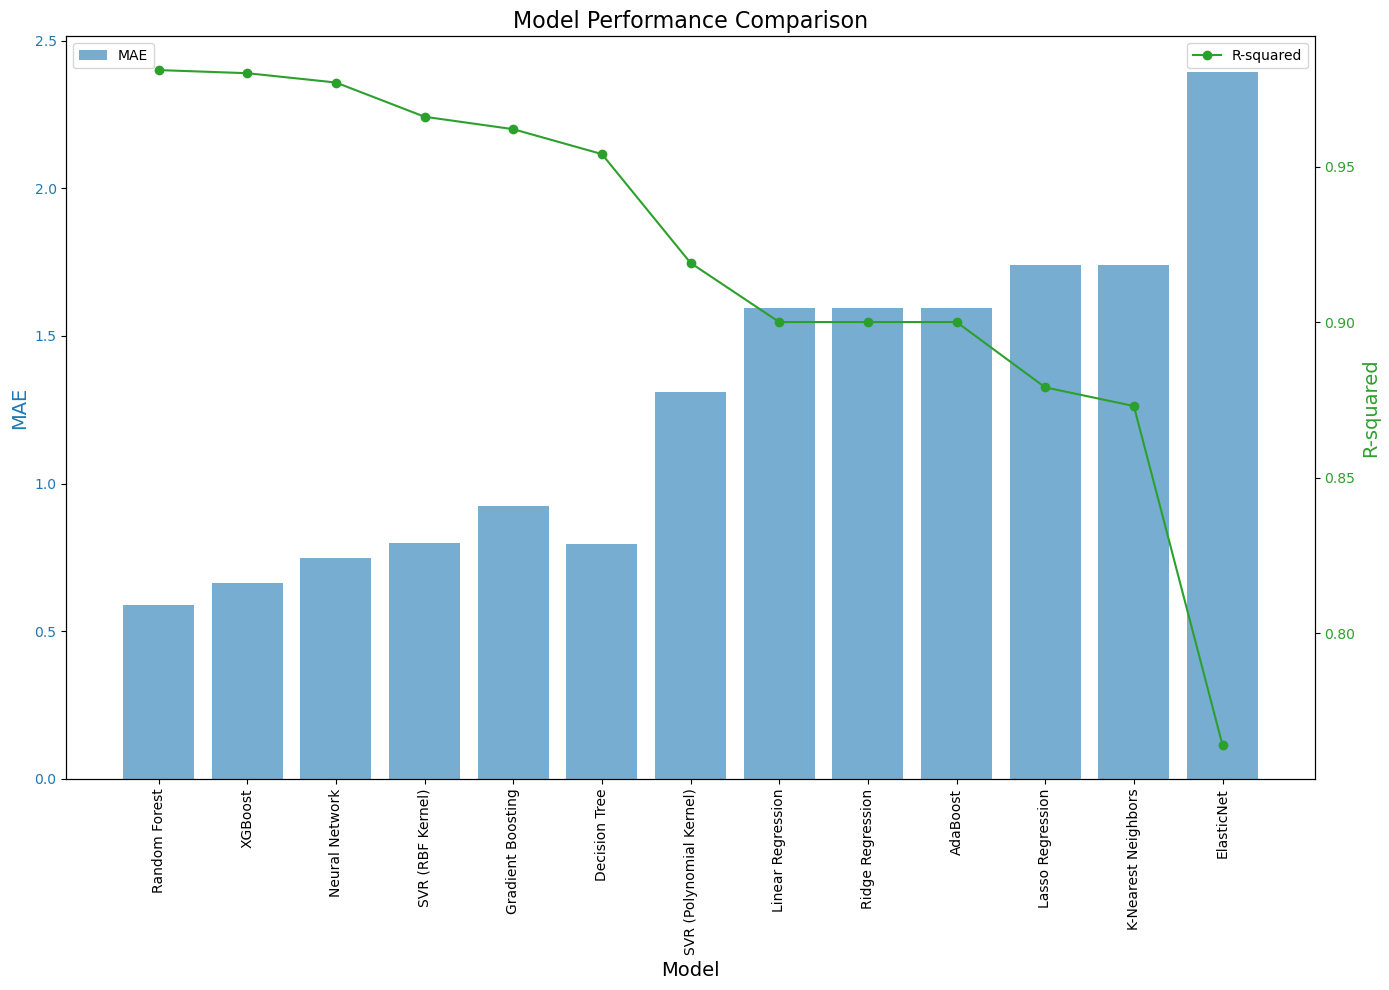

In [46]:
# Given model performance results
model_performance = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'K-Nearest Neighbors', 
              'Decision Tree', 'Random Forest', 'Gradient Boosting', 'AdaBoost', 'XGBoost', 
              'ElasticNet', 'SVR (RBF Kernel)', 'SVR (Polynomial Kernel)', 'Neural Network'],
    'MAE': [1.595, 1.595, 1.739, 1.740, 0.797, 0.590, 0.925, 1.593, 0.664, 2.395, 0.799, 1.310, 0.749],
    'MSE': [4.198, 4.197, 5.055, 5.313, 1.915, 0.813, 1.599, 4.170, 0.834, 9.879, 1.415, 3.372, 0.945],
    'R-squared': [0.900, 0.900, 0.879, 0.873, 0.954, 0.981, 0.962, 0.900, 0.980, 0.764, 0.966, 0.919, 0.977]
}

# Convert to DataFrame
df = pd.DataFrame(model_performance)

# Sort the models by R-squared in descending order
df_sorted = df.sort_values(by='R-squared', ascending=False)

# Plot
fig, ax1 = plt.subplots(figsize=(14, 10))

# Bar plot for MAE
ax1.set_xlabel('Model', fontsize=14)
ax1.set_ylabel('MAE', fontsize=14, color='tab:blue')
ax1.bar(df_sorted['Model'], df_sorted['MAE'], color='tab:blue', alpha=0.6, label='MAE')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.tick_params(axis='x', rotation=90)
ax1.legend(loc='upper left')

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

# Line plot for R-squared
ax2.set_ylabel('R-squared', fontsize=14, color='tab:green')
ax2.plot(df_sorted['Model'], df_sorted['R-squared'], color='tab:green', label='R-squared', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:green')
ax2.legend(loc='upper right')

# Title
plt.title('Model Performance Comparison', fontsize=16)

# Show plot
plt.tight_layout()
plt.show()

#### Model Interpretations 

Upon training and evaluating the models, Random Forest, XGBoost regressor and Neural Network have emerged as top performers, exhibiting the lowest Mean Absolute Error (MAE) and highest R-squared values, indicating strong predictive accuracy and model fit. These results suggest that ensemble methods, which aggregate predictions from multiple model are particularly effective for this task and underscore the adaptability  and learning capability of neural networks, which, through their layered architecture and non-linear transformations, excel in capturing complex patterns within the data. These three models, given their promising initial performance, have been chosen for further optimization through hyperparameter tuning, with the aim of enhancing their predictive precision.

# Fine-Tuning the Model <a class="anchor" id="model-fine-tuning"></a>

In [47]:
#standardizing Test Set
X_test_scaled = scaler.transform(X_test)

## Neural Network <a class="anchor" id="neural-network"></a>

In [48]:
#pip install keras-tuner

### Neural Network :  FineTuning

In [50]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=512, step=32),
                    activation='relu',
                    input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=512, step=32),
                    activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(hp.Float('learning_rate', min_value=1e-5, max_value=1e-1, sampling='LOG')),
                  loss='mean_squared_error')
    return model

# creating a tuner with Random Search strategy
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=20,  # Set this to a higher number for better results
    executions_per_trial=3,
    directory='my_dir',
    project_name='fifa_rating'
)

# performing hyperparameter tuning
tuner.search(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=50, batch_size=10)

# getting the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The optimal number of units in the first densely-connected
layer is {best_hps.get('units_1')} and in the second layer is {best_hps.get('units_2')}.
The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")

Trial 20 Complete [00h 03m 10s]
val_loss: 21.591947555541992

Best val_loss So Far: 0.8620510101318359
Total elapsed time: 00h 35m 29s

The optimal number of units in the first densely-connected
layer is 256 and in the second layer is 32.
The optimal learning rate for the optimizer is 0.00024121814791861377.



After conducting hyperparameter tuning with a Random Search strategy for the neural network, the process yielded an optimal architecture and learning rate. Specifically, the first hidden layer should have 256 neurons, and the second should have 32, with an optimal learning rate set at approximately 0.000241. This configuration achieved the best validation loss of 0.862, indicating a well-fitting model

With these parameters, I will now train a final Neural Network model and evaluate it on my test set to check its performance.

### Neural Network : Final Evaluation 

In [49]:
# EVALUATION ON TEST SET

# setting random seeds for reproducibility
python_random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Rebuild the model with the optimal hyperparameters
optimal_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.1),  # Example dropout layer, can be tuned as well
    Dense(32, activation='relu'),
    Dense(1)
])

# compiling the model with the optimal learning rate
optimal_model.compile(optimizer=Adam(learning_rate=0.00024121814791861377), loss='mean_squared_error')

# fitting the model on the training data
optimal_model.fit(X_train_scaled, y_train, epochs=50, batch_size=10)  # Epochs and batch size can be tuned

# evaluating the model on the test data
y_test_pred_nn = optimal_model.predict(X_test_scaled)
nn_test_mae = mean_absolute_error(y_test, y_test_pred_nn)
nn_test_mse = mean_squared_error(y_test, y_test_pred_nn)
nn_test_r2 = r2_score(y_test, y_test_pred_nn)

# printing the performance metrics for the test set
print(f'Neural Network:\nMAE: {nn_test_mae:.3f}, MSE: {nn_test_mse:.3f}, R-Squared: {nn_test_r2:.3f}\n')

Epoch 1/50


/Users/kuartina/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1153/1153 ━━━━━━━━━━━━━━━━━━━━ 1s 295us/step - loss: 1816.6014
Epoch 2/50
1153/1153 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 33.2011
Epoch 3/50
1153/1153 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - loss: 17.8105
Epoch 4/50
1153/1153 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - loss: 11.7041
Epoch 5/50
1153/1153 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - loss: 9.0994
Epoch 6/50
1153/1153 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - loss: 7.2730
Epoch 7/50
1153/1153 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - loss: 6.8591
Epoch 8/50
1153/1153 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 6.0149
Epoch 9/50
1153/1153 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - loss: 5.7606
Epoch 10/50
1153/1153 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - loss: 5.3777
Epoch 11/50
1153/1153 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - loss: 5.1467
Epoch 12/50
1153/1153 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - loss: 5.0375
Epoch 13/50
1153/1153 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - loss: 4.8904
Epoch 14/50
1153/1153 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - loss: 4.7647
Epoch 

The test set evaluation of the fine-tuned Neural Network model shows improvement over the initial model, with a decrease in the mean absolute error (MAE) from 0.749 to 0.663, and mean squared error (MSE) from 0.945 to 0.779. Additionally, the R-squared value has increased from 0.977 to 0.981, indicating a model that explains a higher proportion of the variance in the data. These results affirm the effectiveness of the hyperparameter optimization.

### Neural Network : Error Analysis <a class="anchor" id="nn-ea"></a>

In [50]:
# flattening the predictions 
y_test_pred_nn_flat = np.ravel(y_test_pred_nn)

# calculating the residuals
residuals_nn = y_test - y_test_pred_nn_flat
residuals_nn_series = pd.Series(residuals_nn)

# statistical summary residuals
residuals_stats = residuals_nn_series.describe()
residuals_stats

count    2469.000000
mean        0.002346
std         0.883055
min        -4.482243
25%        -0.469135
50%         0.045570
75%         0.560856
max         2.624809
Name: Overall, dtype: float64

The residuals from the neural network model have a very low mean close to zero, which indicates on average the predictions are quite accurate. However, the standard deviation and the range of residuals, from -4.48 to 2.62, suggest that there are some predictions with significant errors.

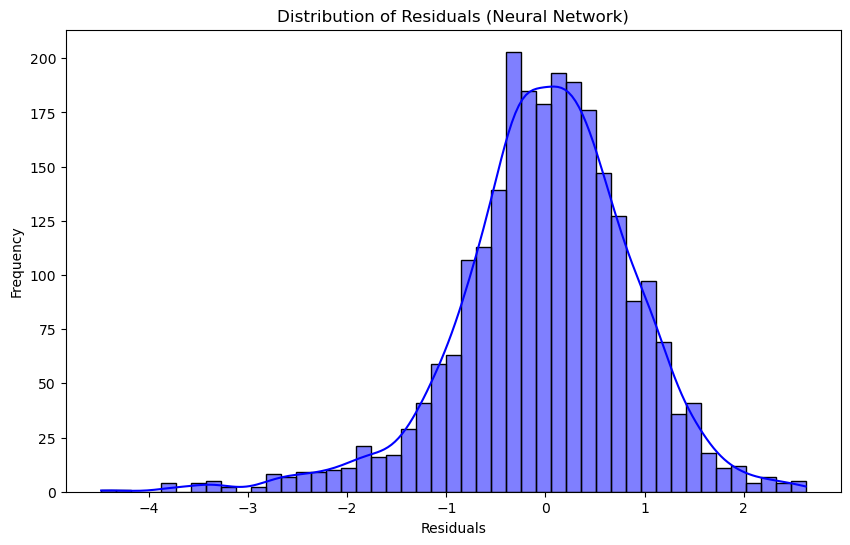

In [51]:
# visualize the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals_nn_series, kde=True, color='blue')
plt.title('Distribution of Residuals (Neural Network)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

The distribution of rsiduals is approximately normal and centered around zero suggesting that the model does not systematically overestimate or underestimate 'Overall' rating. The bell shape and its alignment with the mean indicate that the model's predictions are mostly consistent, with a few outliers, as evidenced by the tails of the distribution.

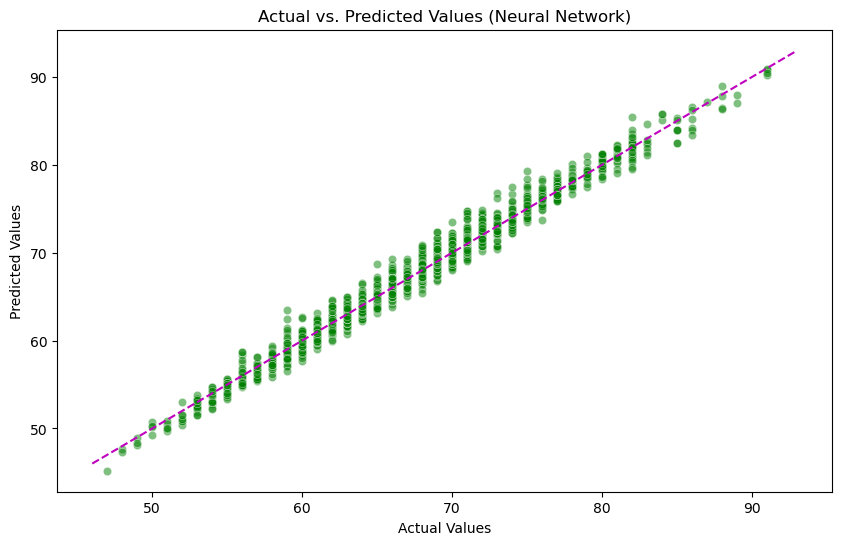

In [52]:
# plotting actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_nn_flat, alpha=0.5, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'm--')
plt.title('Actual vs. Predicted Values (Neural Network)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

The majority of points cluster tightly along the identity line, although there is some deviation, suggesting occasional discrepancies between predictions and true values. Overall, the model demonstrates a high level of predictive performance.

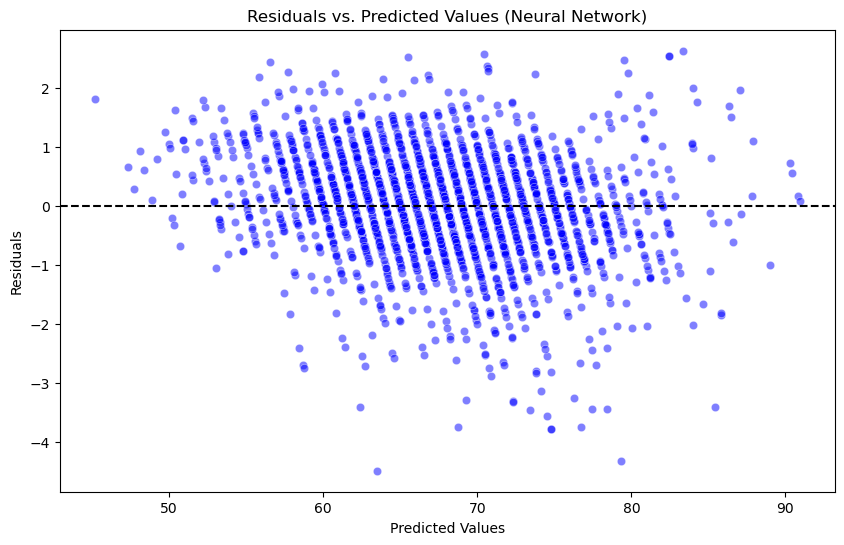

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_pred_nn_flat, y=residuals_nn_series, alpha=0.5, color='blue')
plt.axhline(y=0, color='k', linestyle='--')
plt.title('Residuals vs. Predicted Values (Neural Network)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Most residuals clustering close to zero, signifying minor prediction errors. There are some outliers, but the lack of any distinct pattern suggests that the model's errors are relatively evenly distributed, with no obvious bias across the range of predictions.

##  Random Forest <a class="anchor" id="random-forest"></a>


### 1. Hyperparameter Tuning : Using Randomized Search

In [49]:
# HYPERPARAMETER TUNING 

# defining the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# creating the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# setting up Randomized Search for Random Forest
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_grid,
    n_iter=100,  # Number of parameter settings to try
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

# performing the Randomized Search
rf_random_search.fit(X_train_scaled, y_train)

# printing the best parameters and best score (converted from negative MSE)
print('Best parameters for Random Forest:', rf_random_search.best_params_)
print("Best score for Random Forest (MSE):", -rf_random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters for Random Forest: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': True}
Best score for Random Forest (MSE): 1.0463337274920164


The results from RandomizedSearchCV suggest that the best hyperparameters are a combination of 500 trees (n_estimators), a minimum sample split of 2 (min_samples_split), a minimum sample leaf of 1 (min_samples_leaf), maximum depth of the trees of 50, and bootstrapping samples when building trees (bootstrap: True).

With these parameters, I will now train a final Random Forest model and evaluate it on my test set to check its performance.

### Random Forest : Final Evaluation (Randomized Search)

In [54]:
# EVALUATION ON TEST SET

# training the final model using the best parameters found by Randomized Search
final_rf_model = RandomForestRegressor(
    n_estimators=500,
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=50,
    bootstrap=True,
    random_state=42,
    n_jobs=-1  # Use all cores available
)

# evaluating on the test set
final_rf_model.fit(X_train_scaled, y_train)
y_test_pred_rf = final_rf_model.predict(X_test_scaled)

# calculating evaluation metrics
test_mae = mean_absolute_error(y_test, y_test_pred_rf)
test_mse = mean_squared_error(y_test, y_test_pred_rf)
test_r2 = r2_score(y_test, y_test_pred_rf)

# printing the evaluation metrics for the test set
print(f'Random Forest RandomSearch Test MAE: {test_mae:.4f}')
print(f'Random Forest RandomSearch Test MSE: {test_mse:.4f}')
print(f'Random Forest RandomSearch Test R-squared: {test_r2:.4f}')

Random Forest RandomSearch Test MAE: 0.5956
Random Forest RandomSearch Test MSE: 1.0047
Random Forest RandomSearch Test R-squared: 0.9755


The test set evaluation of the fine-tuned Random Forest model shows no improvement over the initial model, with an increase in the mean absolute error (MAE) from 0.590 to 0.5956, and mean squared error (MSE) from 0.813 to 1.0047 and the R-squared value has decreased from 0.981 to 0.9755

I will try using GridSearch CV to see if things change.

### 2. Hyperparameter Tuning : Using GridSearchCV

In [41]:
# HYPERPARAMETER TUNING 

# defining the parameter grid 
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# setting up the GridSearchCV 
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=param_grid,
                              cv=5,
                              n_jobs=-1,
                              scoring='neg_mean_squared_error',
                              verbose=2)

# performing the grid search 
grid_search_rf.fit(X_train_scaled, y_train)

# printing the best parameters and best score (converted from negative MSE)
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest (MSE):", -grid_search_rf.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters for Random Forest: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best score for Random Forest (MSE): 1.046784765493191


The best parameters for the Random Forest model, using GridSearchCV are bootstrap: True, max_depth: None, min_samples_leaf: 1, min_samples_split: 2, and n_estimators: 300. Cross-Validation got a mean squared error (MSE) score of approximately 1.0468 on the training set.

I will now create and evaluate the Random Forest model with these parameters on the test set to get a sense of its performance on unseen data:

### Random Forest : Final Evaluation (Grid Search)

In [55]:
# EVALUATION ON TEST SET

# training the final model using the best parameters found by GridSearchCV
final_rf_model_grid = RandomForestRegressor(
    bootstrap=True,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

final_rf_model_grid.fit(X_train_scaled, y_train)

# evaluating on the test set
y_test_pred_rf_grid = final_rf_model_grid.predict(X_test_scaled)

# calculating evaluation metrics
test_mae_rf_grid = mean_absolute_error(y_test, y_test_pred_rf_grid)
test_mse_rf_grid = mean_squared_error(y_test, y_test_pred_rf_grid)
test_r2_rf_grid = r2_score(y_test, y_test_pred_rf_grid)

# printing the evaluation metrics for the test set
print(f'Random Forest GridSearch Test MAE: {test_mae_rf_grid:.4f}')
print(f'Random Forest GridSearch Test MSE: {test_mse_rf_grid:.4f}')
print(f'Random Forest GridSearch Test R-squared: {test_r2_rf_grid:.4f}')

Random Forest GridSearch Test MAE: 0.5956
Random Forest GridSearch Test MSE: 1.0105
Random Forest GridSearch Test R-squared: 0.9753


The results from both tuning methods are nearly identical and show no improvement over the initial model. This could mean that the default settings for the Random Forest Model is robust. 

ANother thought : Despite the RandomSearchCV suggesting a larger number of trees (n_estimators: 500), the performance on the test set between the two models is essentially the same. This could indicate that additional trees beyond 300 do not provide significant benefits for the added computation.

### Random Forest : Cross Validation

In [56]:
# setting up the XGBoost model with the best parameters found
rf_model = RandomForestRegressor(bootstrap=True,
                                max_depth=None,
                                min_samples_leaf=1,
                                min_samples_split=2,
                                n_estimators=300,
                                random_state=42,
                                n_jobs=-1)

# defining the K-fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# performing cross-validation
cv_scores_rf = cross_val_score(rf_model, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')

# calculating the mean and standard deviation of the cross-validation scores
cv_mse_mean_rf = -cv_scores_rf.mean()
cv_mse_std_rf = cv_scores_rf.std()

print(f'Cross-Validation RF MSE Mean: {cv_mse_mean_rf:.3f}')
print(f'Cross-Validation RF MSE Standard Deviation: {cv_mse_std_rf:.3f}')

Cross-Validation RF MSE Mean: 1.095
Cross-Validation RF MSE Standard Deviation: 0.126


The Random Forest model exhibits a cross-validated mean squared error (MSE) of approximately 1.095, indicating a modest average prediction error. A standard deviation of the MSE at 0.126 across the folds implies consistent performance on different data subsets. This is decent

### Random Forest : Feature Importance <a class="anchor" id="rf-features"></a>

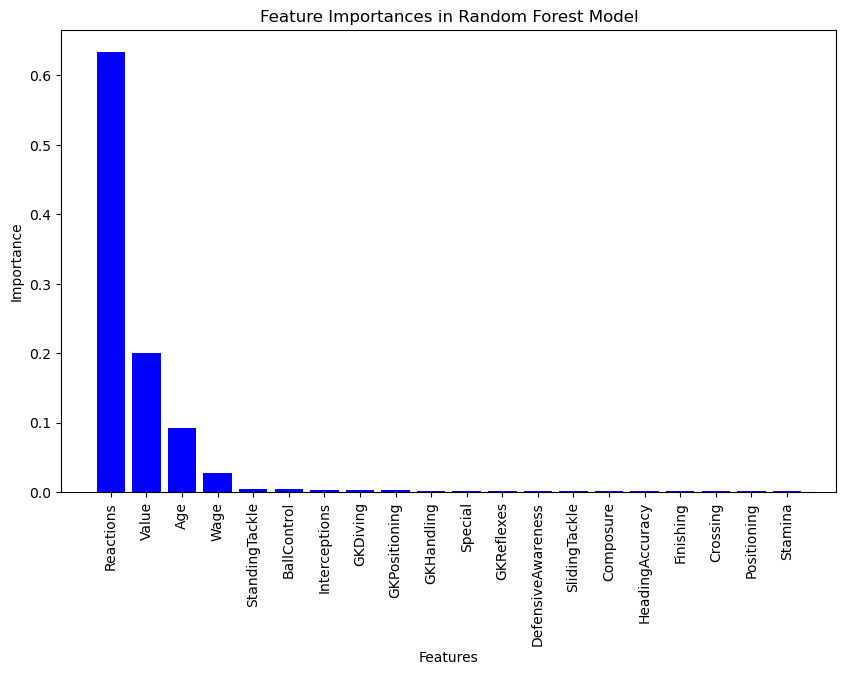

In [57]:
# getting feature importances
importances = final_rf_model.feature_importances_
feature_names = X.columns

# creating a DataFrame
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# sorting the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# plotting feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'][:20], feature_importance_df['Importance'][:20], color = 'blue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest Model')
plt.xticks(rotation=90)
plt.show()

The most significant feature is 'Reactions', showing a substantial impact on the model's predictions. Other features such as 'Value' and 'Age' also play impact overall rating but to a lesser extent. The rapid drop in the relative importance of features suggests that the model relies heavily on 'Reactions' to predict the target variable.

### Random Forest : Error Analysis <a class="anchor" id="rf-ea"></a>

In [58]:
# random forest residual
residuals_rf = y_test - y_test_pred_rf
# statistical summary of residuals
residuals_rf.describe()

count    2469.000000
mean        0.033740
std         1.001975
min        -7.592000
25%        -0.370000
50%        -0.026000
75%         0.348000
max        18.254000
Name: Overall, dtype: float64

Mean is close to zero, suggesting no significant bias in predictions. However, the std dev and the range between the min and max residual values indicate variability in the model's accuracy, with some predictions deviating substantially from actual values. 

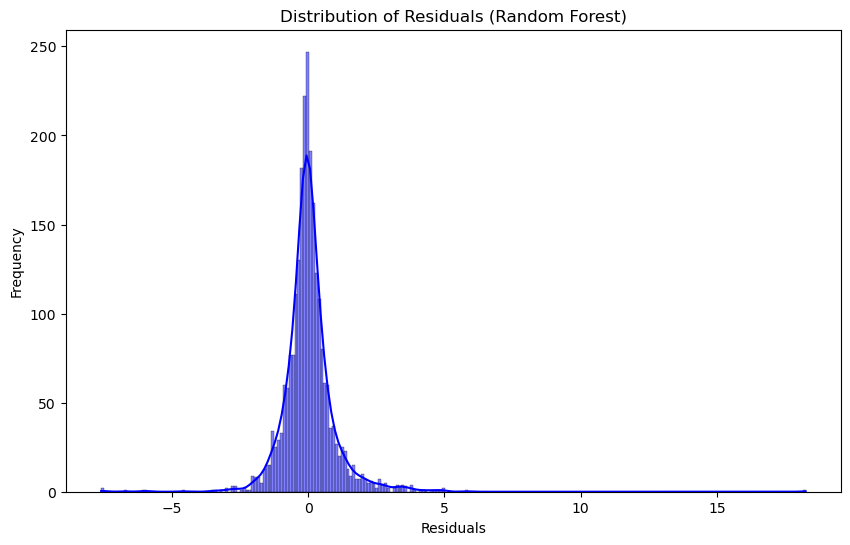

In [59]:
# plotting the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals_rf, kde=True, color='blue')
plt.title('Distribution of Residuals (Random Forest)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

The mean is close to zero, suggesting accurate predictions on average. The spread towards the tails, particularly the long tail extending to the right, indicates occasional large errors

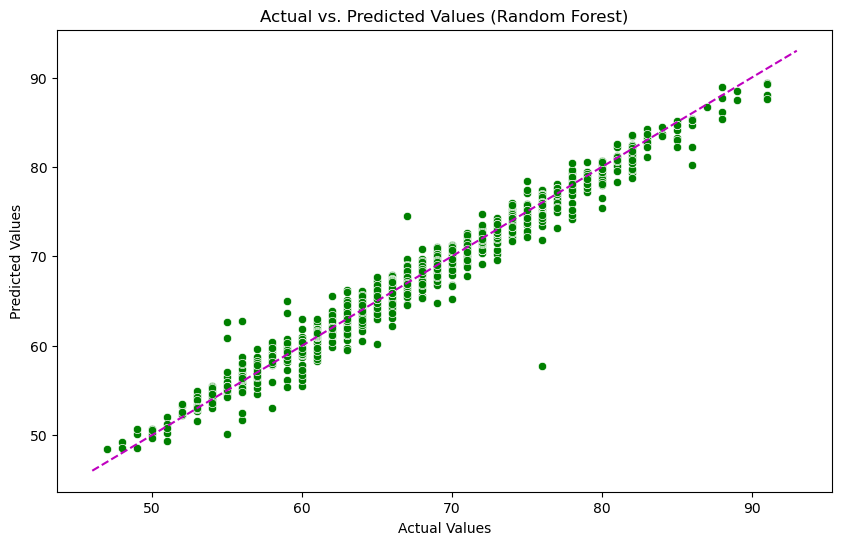

In [60]:
# plotting actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_rf, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'm--')
plt.title('Actual vs. Predicted Values (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

The model has a high predictive accuracy for a wide range of values, although there are some instances of variance from the expected results

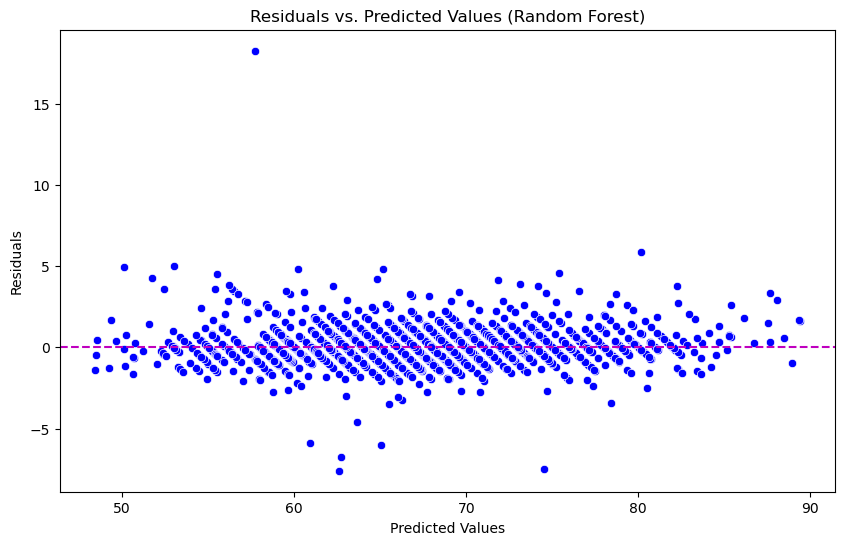

In [61]:
# plotting residuals vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_pred_rf, y=residuals_rf, color='blue')
plt.axhline(y=0, color='m', linestyle='--')
plt.title('Residuals vs. Predicted Values (Random Forest)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

The residuals are fairly evenly distributed across the range of predicted values, with no clear pattern indicating bias in prediction. The majority of data points are clustered near the zero line, suggesting that the model’s predictions are mostly accurate with consistent variance. The spread of residuals indicates potential for model improvement, particularly for extreme value predictions.

In [62]:
# looking at extreme residuals
extreme_residuals_rf = residuals_rf.abs().nlargest(10)
extreme_cases_rf = fifa_model.loc[extreme_residuals_rf.index]
extreme_cases_rf

,Age,Overall,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Height,...,Best Position_GK,Best Position_LB,Best Position_LM,Best Position_LW,Best Position_LWB,Best Position_RB,Best Position_RM,Best Position_RW,Best Position_RWB,Best Position_ST
4093,21,76,17000000.0,800000.0,1829,1,1.0,4.0,3.0,170.0,...,False,False,False,False,False,False,True,False,False,False
12081,18,55,325000000.0,500000.0,1546,1,1.0,3.0,2.0,172.0,...,False,False,False,False,False,False,False,False,False,False
9662,40,67,0.0,3000.0,1642,1,1.0,3.0,2.0,175.0,...,False,False,False,False,False,False,False,False,False,False
16239,41,56,15000000.0,600000.0,1018,0,1.0,2.0,1.0,188.0,...,True,False,False,False,False,False,False,False,False,False
11498,41,59,0.0,1000.0,1570,1,1.0,3.0,2.0,175.0,...,False,False,False,False,False,False,False,False,False,False
14062,22,55,0.0,0.0,1431,1,1.0,3.0,2.0,174.0,...,False,False,False,False,False,True,False,False,False,False
15118,36,86,7500000.0,78000.0,1289,1,3.0,3.0,1.0,193.0,...,True,False,False,False,False,False,False,False,False,False
13478,20,58,190000000.0,1000.0,1473,0,1.0,2.0,2.0,175.0,...,False,False,False,False,False,False,False,False,False,True
16657,22,55,110000000.0,1000.0,844,1,1.0,1.0,1.0,183.0,...,True,False,False,False,False,False,False,False,False,False
4504,24,70,0.0,0.0,1814,0,1.0,5.0,2.0,185.0,...,False,False,False,False,False,False,False,False,False,True


### XGBoost <a class="anchor" id="XG-Boost"></a>

### Hyperparameter Tuning

In [42]:
#  the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
}

# Initialize the XGBoost regressor
xgb_model = XGBRegressor(random_state=42)

# Initialize the GridSearchCV object
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, 
                               scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search_xgb.fit(X_train_scaled, y_train)

# Print the best parameters and the corresponding score
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best score for XGBoost (MSE):", -grid_search_xgb.best_score_)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Best score for XGBoost (MSE): 0.7027025251239309
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  30.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  43.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  42.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  40.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  27.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  40.6s
[CV] END bootstrap=True, max_depth=None, 

The results from the hyperparameter tuning for XGBoost show that the best settings are colsample_bytree: 0.8, learning_rate: 0.1, max_depth: 5, n_estimators: 300, and subsample: 0.8. 
The Cross-Validation got a mean squared error (MSE) score of approximately 0.7027, which indicates how well the XGBoost model performed with these hyperparameters on the training set.

I will train the final XGBoost model using these optimal hyperparameters and evaluate its performance on the test set.

### XGBoost : Final Evaluation

In [63]:
# # EVALUATION ON TEST SET

# train the final model using the best parameters
final_xgb_model = XGBRegressor(
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=300,
    subsample=0.8,
    random_state=42
)

final_xgb_model.fit(X_train_scaled, y_train)

# redict and evaluate on the test set
y_test_pred_xgb = final_xgb_model.predict(X_test_scaled)
test_mae_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
test_mse_xgb = mean_squared_error(y_test, y_test_pred_xgb)
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)

# Print the evaluation metrics for the test set
print(f'XGBoost Test MAE: {test_mae_xgb:.4f}')
print(f'XGBoost Test MSE: {test_mse_xgb:.4f}')
print(f'XGBoost Test R-squared: {test_r2_xgb:.4f}')

XGBoost Test MAE: 0.5632
XGBoost Test MSE: 0.6274
XGBoost Test R-squared: 0.9847


The test set evaluation of the fine-tuned XGBoost model shows improvement over the initial model, with a decrease in the mean absolute error (MAE) from 0.664 to 0.5632, and mean squared error (MSE) from 0.834 to 0.6274. Additionally, the R-squared value has increased from 0.980 to 0.9847, indicating a model that explains a higher proportion of the variance in the data. This affirms the effectiveness of the hyperparameter optimization.

### XGBoost : Cross Validation

In [64]:
# setting up the XGBoost model with the best parameters found
xgb_model = xgb.XGBRegressor(colsample_bytree=0.8,
                             learning_rate=0.1,
                             max_depth=5,
                             n_estimators=300,
                             subsample=0.8)

# setting up the K-fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# performing cross-validation
cv_scores = cross_val_score(xgb_model, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')

# calculating the mean and standard deviation of the cross-validation scores
cv_mse_mean = -cv_scores.mean()
cv_mse_std = cv_scores.std()

print(f'Cross-Validation MSE Mean: {cv_mse_mean:.3f}')
print(f'Cross-Validation MSE Standard Deviation: {cv_mse_std:.3f}')

Cross-Validation MSE Mean: 0.679
Cross-Validation MSE Standard Deviation: 0.046


The cross-validation suggests that XGBoost model, on average, has a solid predictive performance across different subsets of the data. The relatively low standard deviation indicates that the performance of the model is quite stable across different folds, showing good generalizability.

### XGBoost : Feature Importance <a class="anchor" id="xgb-features"></a>

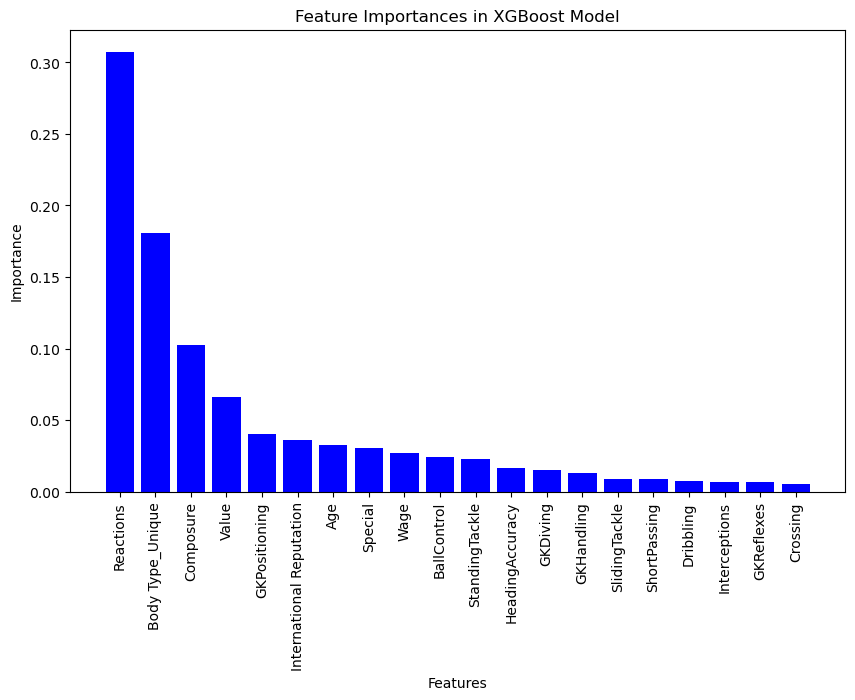

In [65]:
# getting feature importances
importances = final_xgb_model.feature_importances_
feature_names = X.columns

# creating a DataFrame 
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# sorting the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# plotting feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'][:20], feature_importance_df['Importance'][:20], color ='blue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in XGBoost Model')
plt.xticks(rotation=90)
plt.show()

### XGBoost : Error Analysis <a class="anchor" id="xgb-ea"></a>

In [66]:
# XGBoost Residuals
residuals_xgb = y_test - y_test_pred_xgb
# Basic statistics of residuals
residuals_xgb.describe()

count    2469.000000
mean       -0.008651
std         0.792172
min        -6.576923
25%        -0.433449
50%        -0.019272
75%         0.410614
max         6.898811
Name: Overall, dtype: float64

The residual statistics from the XGBoost model show a mean very close to zero, suggesting on average the model's predictions are unbiased. The standard deviation is relatively small, which implies that most predictions are close to the actual values. However, the range of residuals is quite wide, with a minimum and maximum of approximately -6.58 and 6.90, respectively, indicating there are some predictions that are significantly off from the actual values.

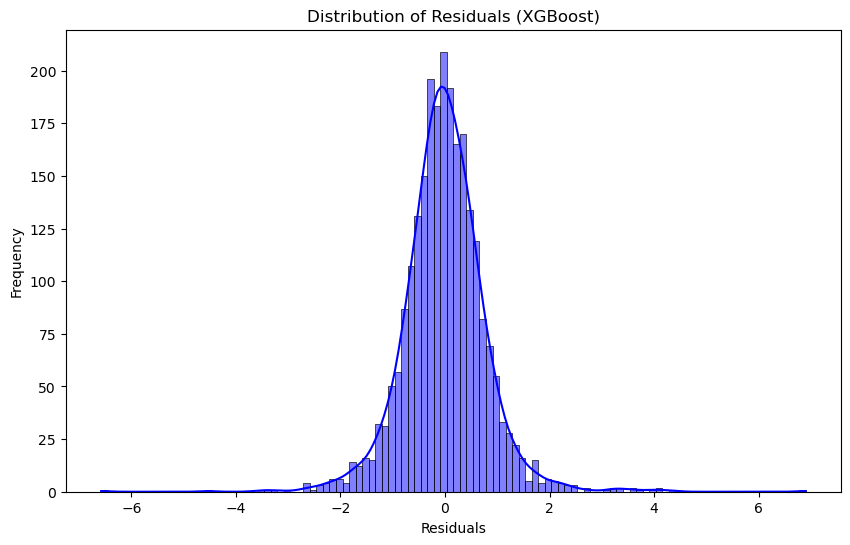

In [67]:
# plotting the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals_xgb, kde=True, color='blue')
plt.title('Distribution of Residuals (XGBoost)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

The distribution is approximately normal and centered around zero, indicating that the model has no systematic bias. The tails of the distribution suggest there are some predictions with larger errors, but the bulk of the predictions are clustered around the true values, which is a sign of good model performance.

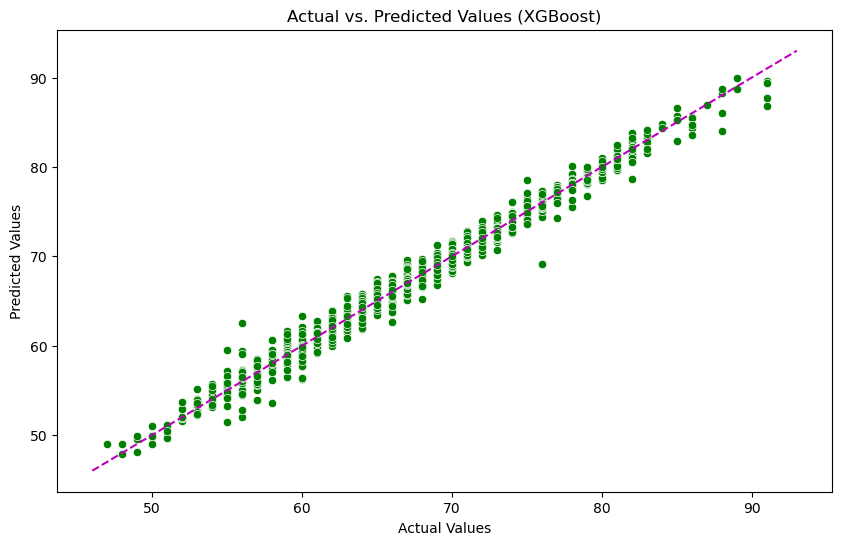

In [68]:
# plotting actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_xgb, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'm--')
plt.title('Actual vs. Predicted Values (XGBoost)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

The scatter plot of actual vs. predicted values indicates that the XGBoost model has a high degree of accuracy, as most points lie near the dashed line, which represents a perfect match between actual and predicted values. The model appears to perform well across the range of 'Overall' ratings, although there is some variance, particularly in the mid-range of actual values where the data points are more spread out from the line.

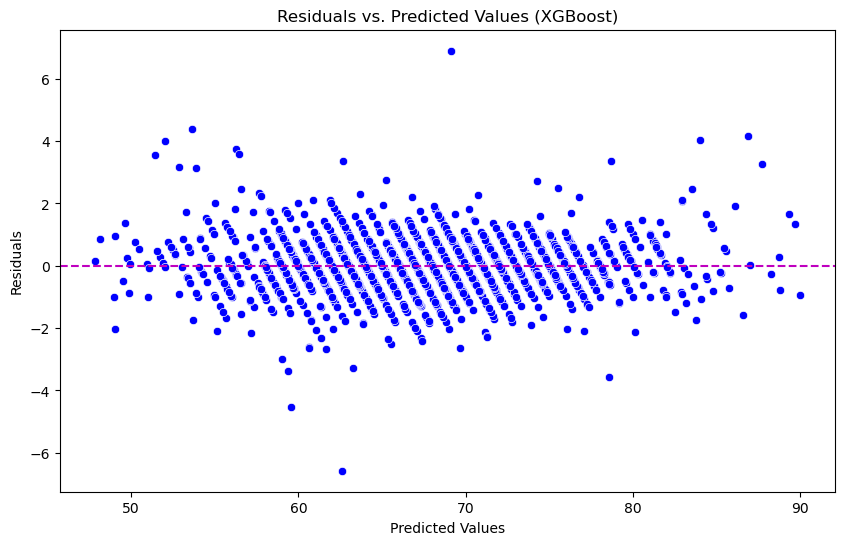

In [69]:
# plotting residuals vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_pred_xgb, y=residuals_xgb, color='blue')
plt.axhline(y=0, color='m', linestyle='--')
plt.title('Residuals vs. Predicted Values (XGBoost)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

The residuals are fairly evenly distributed across the range of predictions, clustering around zero, which is indicative of a well-fitting model. There does not appear to be a clear pattern or systematic bias in the residuals, suggesting that the model’s errors are random/ However, there's a slight increase in variance as the predicted value increases, which could indicate heteroscedasticity.

In [70]:
# checking the extreme residuals
extreme_residuals = residuals_xgb.abs().nlargest(10)
extreme_cases = fifa_model.loc[extreme_residuals.index]
extreme_cases

,Age,Overall,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Height,...,Best Position_GK,Best Position_LB,Best Position_LM,Best Position_LW,Best Position_LWB,Best Position_RB,Best Position_RM,Best Position_RW,Best Position_RWB,Best Position_ST
4093,21,76,17000000.0,800000.0,1829,1,1.0,4.0,3.0,170.0,...,False,False,False,False,False,False,True,False,False,False
16239,41,56,15000000.0,600000.0,1018,0,1.0,2.0,1.0,188.0,...,True,False,False,False,False,False,False,False,False,False
12081,18,55,325000000.0,500000.0,1546,1,1.0,3.0,2.0,172.0,...,False,False,False,False,False,False,False,False,False,False
13478,20,58,190000000.0,1000.0,1473,0,1.0,2.0,2.0,175.0,...,False,False,False,False,False,False,False,False,False,True
3,30,91,125500000.0,350000.0,2304,1,4.0,5.0,4.0,181.0,...,False,False,False,False,False,False,False,False,False,False
251,20,88,137500000.0,110000.0,2102,0,4.0,3.0,3.0,194.0,...,False,False,False,False,False,False,False,False,False,True
15051,17,56,180000000.0,500000.0,1304,1,1.0,3.0,3.0,179.0,...,False,False,False,False,False,False,False,True,False,False
16159,35,60,25000000.0,1000.0,1046,1,1.0,3.0,1.0,190.0,...,True,False,False,False,False,False,False,False,False,False
15187,20,60,300000000.0,950000.0,1268,1,1.0,2.0,2.0,190.0,...,False,False,False,False,False,False,False,False,False,False
928,34,75,0.0,0.0,1999,1,4.0,3.0,3.0,183.0,...,False,False,False,False,False,False,False,False,False,False


# Comparison <a class="anchor" id="comparison"></a>

Comparing all 3 fine-tuned models. 
To determine the "best" model, the model with the lowest mean absolute error (MAE) and highest R-Squared would typically be the best choice. 

I will visualise that now.

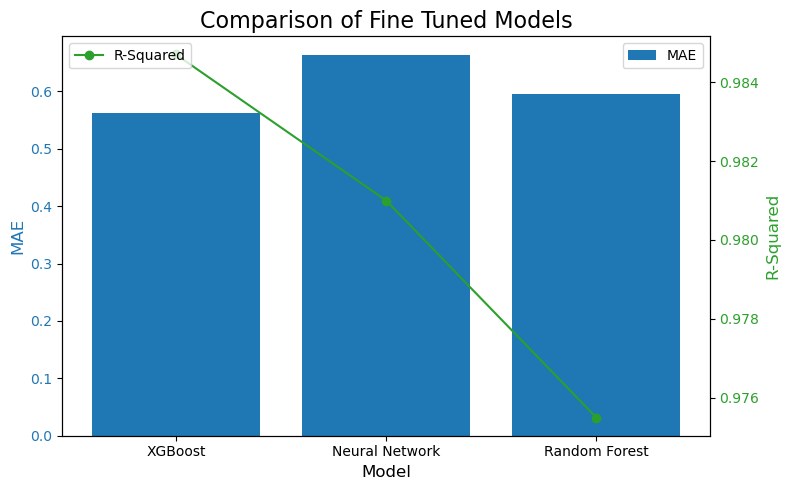

In [73]:
# Fine Tuned Models
models_data = {
    'Model': ['Neural Network', 'Random Forest', 'XGBoost'],
    'MAE': [0.663, 0.5956, 0.5632],
    'R-Squared': [0.981, 0.9755, 0.9847]
}

# creating a DataFrame 
df = pd.DataFrame(models_data)

# sorting the models by MAE in ascending order
df_sorted = df.sort_values(by='R-Squared', ascending=False)

# creating the plot 
fig, ax1 = plt.subplots(figsize=(8, 5))

# bar plot for MAE
ax1.set_title('Comparison of Fine Tuned Models', fontsize=16)
ax1.set_xlabel('Model', fontsize=12)
ax1.set_ylabel('MAE', fontsize=12, color='tab:blue')
ax1.bar(df_sorted['Model'], df_sorted['MAE'], color='tab:blue', label='MAE')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper right')

# line plot for R-squared
ax2 = ax1.twinx()
ax2.set_ylabel('R-Squared', fontsize=12, color='tab:green')
ax2.plot(df_sorted['Model'], df_sorted['R-Squared'], color='tab:green', marker='o', label='R-Squared')
ax2.tick_params(axis='y', labelcolor='tab:green')
ax2.legend(loc='upper left')

# showing the plot
fig.tight_layout()
plt.show()

XGBoost has the best performance followed closely by Neural Network. 

I will quickly look at the residuals for both models.

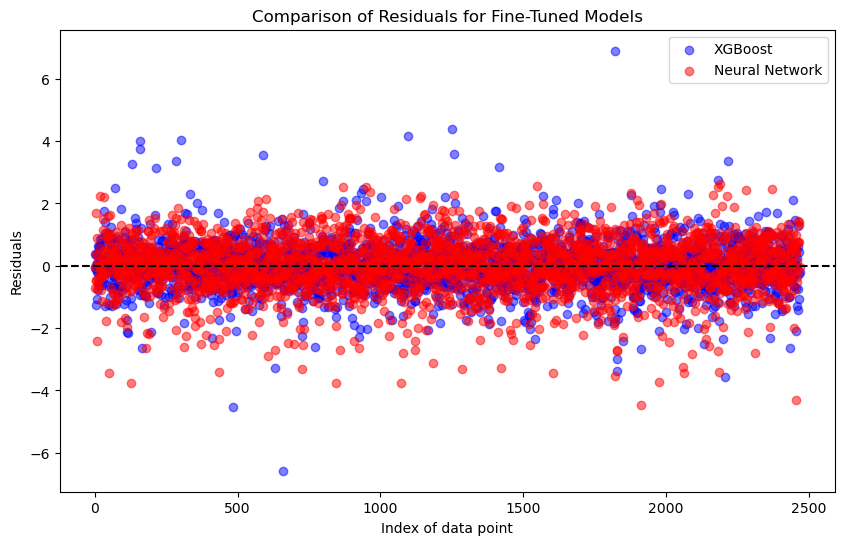

In [74]:
# Plot the residuals for each model
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals_xgb)), residuals_xgb, alpha=0.5, label='XGBoost', c='blue')
plt.scatter(range(len(residuals_nn)), residuals_nn, alpha=0.5, label='Neural Network', c='red')

# Plot a horizontal line at zero to show where perfect predictions would lie
plt.axhline(y=0, color='black', linestyle='--')

# Label the axes and the plot
plt.xlabel('Index of data point')
plt.ylabel('Residuals')
plt.title('Comparison of Residuals for Fine-Tuned Models')
plt.legend()
plt.show()

Both models have residuals that fluctuate above and below the zero line without veering too far, indicating that none of the models consistently underpredict or overpredict across their prediction range but XGBoost reveals a wider spread of residuals, especially for higher predicted values, which could mean a decrease in prediction accuracy at these levels.



##### In terms of consistency and reliability, the Neural Network has demonstrated a notable improvement post-tuning, closing the gap in MAE and surpassing in R-squared. While XGBoost shows remarkable consistency pre and post-tuning, the improvements in the Neural Network’s error distribution post-tuning give it a slight edge.

# Conclusion <a class="anchor" id="conclusion"></a>

Initial analysis ranked RandomForest, XGBoost, and Neural-Network as top contenders based on their MAE and R-squared values. Fine-tuning these models revealed varying degrees of enhancement. While RandomForest's metrics plateaued, the Neural Network and XGBoost models exhibited noteworthy improvements. 

In-depth error analysis, prioritizing the consistency and distribution of residuals, placed the Neural Network slightly ahead, due to its more homogenous error distribution and error magnitude. XGBoost, although it achieved marginally superior MAE and R-squared metrics, revealed slightly more variability in its errors.

This suggests that in scenarios where consistent prediction across various 'Overall' ratings is crucial, such as for player evaluation in FIFA22, the Neural Network might be preferred due to its reliability, despite the slight trade-off in performance metrics. However, for applications where the utmost predictive accuracy is required, XGBoost's higher performance could be more desirable.

In [64]:
#!jupyter nbconvert --to pdf MSIN0097.ipynb